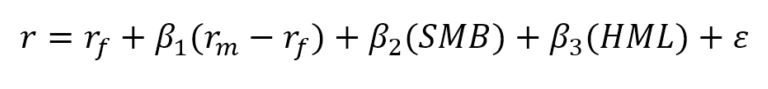

In [1]:
import pandas_datareader.data as reader
import pandas as pd
import datetime as dt
import statsmodels.api as sm

In [6]:
end = dt.datetime.now()
start = dt.date(end.year - 5, end.month, end.day)
funds = ['FDGRX'] #fidelity

In [7]:
reader.get_data_yahoo(funds,start,end)['Adj Close']

Symbols,FDGRX
Date,
2016-12-19,10.932183
2016-12-20,11.014380
2016-12-21,10.988975
2016-12-22,10.917238
2016-12-23,10.994952
...,...
2021-12-09,41.020000
2021-12-10,41.009998
2021-12-13,40.279999


In [9]:
returns = reader.get_data_yahoo(funds,start,end)['Adj Close'].pct_change()

In [10]:
returns_month = returns.resample('M').agg(lambda x: (x+1).prod() -1)


In [26]:
returns_month = returns_month[:-2] 
#must be equal to the factors check the 10th cell

In [27]:
returns_month

Symbols,FDGRX
Date,
2016-12-31,-0.010165
2017-01-31,0.042989
2017-02-28,0.036380
2017-03-31,0.020223
2017-04-30,0.022739
2017-05-31,0.046671
2017-06-30,0.007494
2017-07-31,0.040509
2017-08-31,0.019141


In [18]:
factors = reader.DataReader('F-F_Research_Data_Factors',
                           'famafrench',start,end)[0]

In [19]:
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-12,1.82,0.09,3.60,0.03
2017-01,1.94,-1.13,-2.74,0.04
2017-02,3.57,-2.04,-1.67,0.04
2017-03,0.17,1.13,-3.33,0.03
2017-04,1.09,0.72,-2.13,0.05
2017-05,1.06,-2.52,-3.75,0.06
2017-06,0.78,2.23,1.49,0.06
2017-07,1.87,-1.46,-0.22,0.07
2017-08,0.16,-1.65,-2.07,0.09


In [30]:
returns_month.shape ,factors.shape

((59, 1), (59, 4))

In [31]:
returns_month.index = factors.index

In [33]:
merg = pd.merge(returns_month,factors,on='Date')

In [34]:
merg

,FDGRX,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-12,-0.010165,1.82,0.09,3.60,0.03
2017-01,0.042989,1.94,-1.13,-2.74,0.04
2017-02,0.036380,3.57,-2.04,-1.67,0.04
2017-03,0.020223,0.17,1.13,-3.33,0.03
2017-04,0.022739,1.09,0.72,-2.13,0.05
2017-05,0.046671,1.06,-2.52,-3.75,0.06
2017-06,0.007494,0.78,2.23,1.49,0.06
2017-07,0.040509,1.87,-1.46,-0.22,0.07
2017-08,0.019141,0.16,-1.65,-2.07,0.09


In [38]:
merg[['Mkt-RF','SMB','HML','RF']] = merg[['Mkt-RF','SMB','HML','RF']]/100

In [39]:
merg

,FDGRX,Mkt-RF,SMB,HML,RF
Date,,,,,
2016-12,-0.010165,0.0182,0.0009,0.0360,0.0003
2017-01,0.042989,0.0194,-0.0113,-0.0274,0.0004
2017-02,0.036380,0.0357,-0.0204,-0.0167,0.0004
2017-03,0.020223,0.0017,0.0113,-0.0333,0.0003
2017-04,0.022739,0.0109,0.0072,-0.0213,0.0005
2017-05,0.046671,0.0106,-0.0252,-0.0375,0.0006
2017-06,0.007494,0.0078,0.0223,0.0149,0.0006
2017-07,0.040509,0.0187,-0.0146,-0.0022,0.0007
2017-08,0.019141,0.0016,-0.0165,-0.0207,0.0009


In [41]:
merg['FDGRX-RF'] = merg.FDGRX - merg.RF #dependent vrbl

In [43]:
y = merg['FDGRX-RF']
X = merg[['Mkt-RF','SMB','HML']]

Xsm = sm.add_constant(X)

In [46]:
mdl = sm.OLS(y,Xsm)
fit = mdl.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               FDGRX-RF   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     266.6
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           9.90e-33
Time:                        02:50:30   Log-Likelihood:                 167.25
No. Observations:                  59   AIC:                            -326.5
Df Residuals:                      55   BIC:                            -318.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.002      1.446      0.154      -0.001       0.007
Mkt-RF         1.1567      0.044     26.408      0.000       1.069       1.245
SMB            0.1794      0.077      2.340      0.023       0.026       0.333
HML           -0.4706      0.054     -8.661      0.000      -0.579      -0.362
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.183
Skew:                           0.021   Prob(JB):                        0.912
Kurtosis:                       2.730   Cond. No.                         41.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alpha > 0 positive performance %3 per month ???

Fidelity has a tendency to invest in small stocks (see SMB positive)

Fidelity has more market risk than the index (see Mkt-RF)

Fidelity likes growth stocks more than the market (see HML)